In [1]:
from keras.datasets import reuters
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense,LSTM, Embedding
from keras.preprocessing import sequence

import numpy
import matplotlib.pyplot as plt
import tensorflow as tf

# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(seed)


Using TensorFlow backend.


In [3]:
# 불러온 데이터를 학습셋과 테스트셋으로 나누기
(X_train, Y_train), (X_test, Y_test) = reuters.load_data(num_words=1000, test_split=0.2)

# 데이터 확인하기
category = numpy.max(Y_train)+1;
print(category, '카테고리')
print(len(X_train), '학습용 뉴스 기사')
print(len(X_test), '테스트용 뉴스 기사')
print(X_train[0])

# 데이터 전처리
x_train = sequence.pad_sequences(X_train, maxlen=100)
x_test = sequence.pad_sequences(X_test, maxlen=100)
y_train = np_utils.to_categorical(Y_train) # 원 핫 인코딩
y_test = np_utils.to_categorical(Y_test)


46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [4]:
# 모델의 설정
model = Sequential()
model.add(Embedding(1000,100))
model.add(LSTM(100,activation='tanh'))
model.add(Dense(46, activation='softmax'))

# 모델의 컴파일
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델의 실행
history = model.fit(x_train, y_train, epochs=20, batch_size=100, validation_data=(x_test, y_test))

# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(x_test,y_test)[1]))

C:\Users\JAELYANG\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 8982 samples, validate on 2246 samples
Epoch 1/20
8982/8982 [==============================] - 35s 4ms/step - loss: 2.5544 - accuracy: 0.3672 - val_loss: 2.0773 - val_accuracy: 0.4978
Epoch 2/20
8982/8982 [==============================] - 34s 4ms/step - loss: 1.9524 - accuracy: 0.4964 - val_loss: 1.8621 - val_accuracy: 0.5289
Epoch 3/20
8982/8982 [==============================] - 34s 4ms/step - loss: 1.8088 - accuracy: 0.5303 - val_loss: 1.7712 - val_accuracy: 0.5436
Epoch 4/20
8982/8982 [==============================] - 34s 4ms/step - loss: 1.7272 - accuracy: 0.5478 - val_loss: 1.7310 - val_accuracy: 0.5592
Epoch 5/20
8982/8982 [==============================] - 34s 4ms/step - loss: 1.6629 - accuracy: 0.5724 - val_loss: 1.6827 - val_accuracy: 0.5659
Epoch 6/20
8982/8982 [==============================] - 35s 4ms/step - loss: 1.5863 - accuracy: 0.5923 - val_loss: 1.6304 - val_accuracy: 0.5824
Epoch 7/20
8982/8982 [==============================] - 36s 4ms/step - loss: 1.574

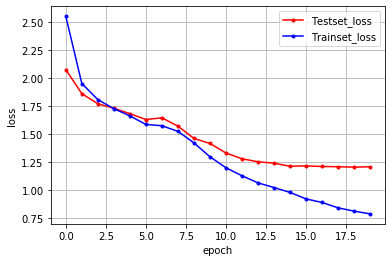

In [5]:
# 테스트셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
